In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.__version__

'2.10.0'

# Classification

In [4]:
fmnist_data = keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

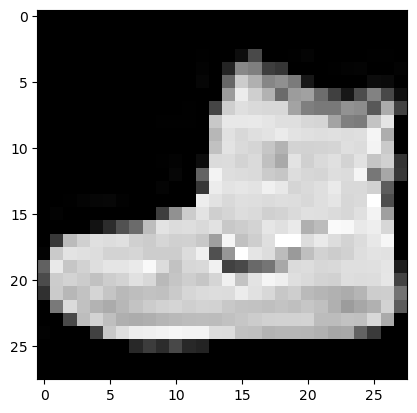

In [10]:
plt.imshow(x_train[0,], cmap="gray")

In [11]:
x_train, x_test = x_train/255.0, x_test/255.0

In [12]:
x_train.shape

(60000, 28, 28)

# Define Model 

In [13]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg')

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 100)               78400     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 75)                7

# Compile Model

## Power lr

In [16]:
sgd = keras.optimizers.SGD(decay=1e-3)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

In [18]:
history_power = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 10s 4ms/step - loss: 0.7182 - accuracy: 0.7624 - val_loss: 0.5288 - val_accuracy: 0.8200
Epoch 2/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.5464 - accuracy: 0.8123 - val_loss: 0.4872 - val_accuracy: 0.8323
Epoch 3/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.5121 - accuracy: 0.8218 - val_loss: 0.4699 - val_accuracy: 0.8358
Epoch 4/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4945 - accuracy: 0.8295 - val_loss: 0.4587 - val_accuracy: 0.8410
Epoch 5/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4852 - accuracy: 0.8309 - val_loss: 0.4521 - val_accuracy: 0.8424
Epoch 6/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4775 - accuracy: 0.8337 - val_loss: 0.4459 - val_accuracy: 0.8450
Epoch 7/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4722 - accuracy: 0.8364 - val_loss: 0.4421 - val_accuracy

In [19]:
history_power

In [20]:
history_power.history

{'loss': [0.7133520245552063,
  0.5450562834739685,
  0.5143792033195496,
  0.49809911847114563,
  0.49178847670555115,
  0.4806087911128998,
  0.4759938716888428,
  0.47105976939201355,
  0.46954476833343506,
  0.4658592641353607,
  0.4634222984313965,
  0.4628917872905731,
  0.45826971530914307,
  0.4557856023311615,
  0.4531953036785126,
  0.45392635464668274,
  0.45131751894950867,
  0.4507002830505371,
  0.44890737533569336,
  0.44890886545181274,
  0.44505569338798523,
  0.4449058771133423,
  0.44543150067329407,
  0.4450777471065521,
  0.4420238137245178,
  0.44288909435272217,
  0.4415382444858551,
  0.44102057814598083,
  0.43976739048957825,
  0.43880459666252136,
  0.4363493323326111,
  0.43927237391471863,
  0.4375571310520172,
  0.43777045607566833,
  0.43499574065208435,
  0.43481019139289856,
  0.4340932071208954,
  0.4366469085216522,
  0.43341678380966187,
  0.43468067049980164,
  0.4324209988117218,
  0.43106913566589355,
  0.4320356845855713,
  0.43189486861228943,
 

In [21]:
history_power.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

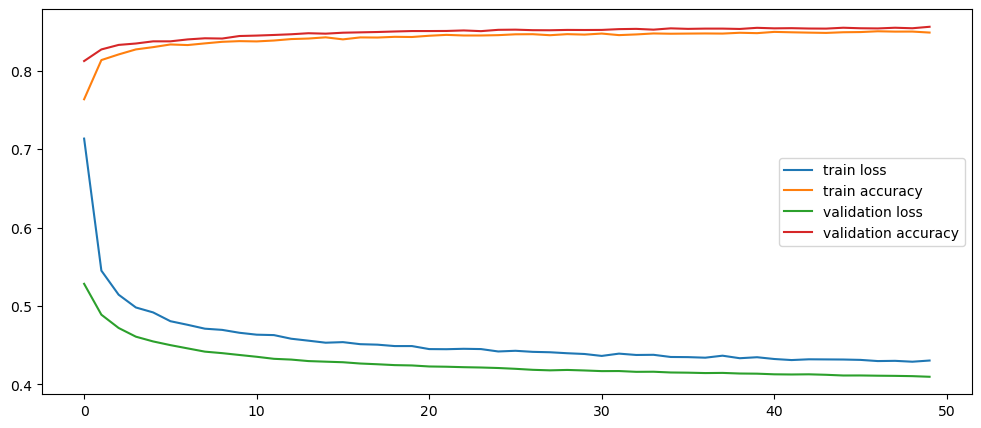

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_power.history["loss"], label="train loss")
ax.plot(history_power.history["accuracy"], label="train accuracy")
ax.plot(history_power.history["val_loss"], label="validation loss")
ax.plot(history_power.history["val_accuracy"], label="validation accuracy")
ax.legend()

## Exp lr

In [23]:
def exp_lr_func(eta0, s):
  def exp_lr(epoch):
    return eta0*0.1**(epoch/s)
  return exp_lr
exp_lr_s = exp_lr_func(0.01, 10)  

In [24]:
exp_lr_c = keras.callbacks.LearningRateScheduler(exp_lr_s)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

C:\Users\AbbasiLio\anaconda3\envs\hossein\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [28]:
history_exp = model.fit(x_train, y_train, epochs=50,
                    validation_split=0.15,
                    callbacks=[exp_lr_c])

Epoch 1/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.6785 - accuracy: 0.7742 - val_loss: 0.4832 - val_accuracy: 0.8281 - lr: 0.0100
Epoch 2/50
1594/1594 [==============================] - 6s 3ms/step - loss: 0.4906 - accuracy: 0.8298 - val_loss: 0.4402 - val_accuracy: 0.8443 - lr: 0.0079
Epoch 3/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4547 - accuracy: 0.8421 - val_loss: 0.4212 - val_accuracy: 0.8489 - lr: 0.0063
Epoch 4/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4367 - accuracy: 0.8460 - val_loss: 0.4096 - val_accuracy: 0.8523 - lr: 0.0050
Epoch 5/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4239 - accuracy: 0.8518 - val_loss: 0.4039 - val_accuracy: 0.8533 - lr: 0.0040
Epoch 6/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4139 - accuracy: 0.8533 - val_loss: 0.3974 - val_accuracy: 0.8570 - lr: 0.0032
Epoch 7/50
1594/1594 [==============================] - 5s

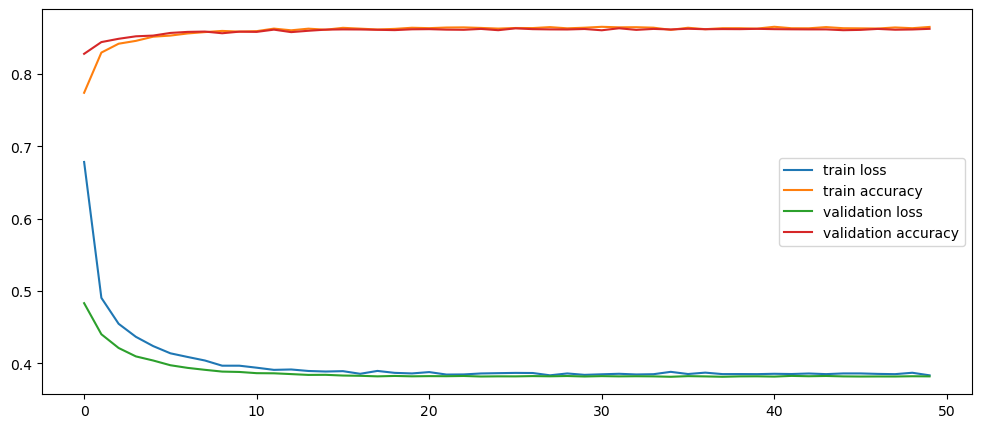

In [29]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_exp.history["loss"], label="train loss")
ax.plot(history_exp.history["accuracy"], label="train accuracy")
ax.plot(history_exp.history["val_loss"], label="validation loss")
ax.plot(history_exp.history["val_accuracy"], label="validation accuracy")
ax.legend()

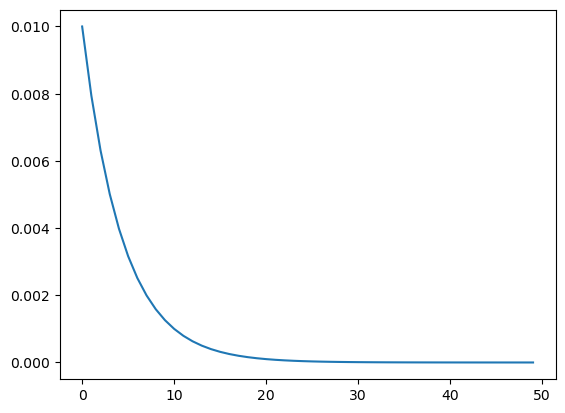

In [30]:
plt.plot(history_exp.epoch, history_exp.history["lr"])

## Piecewise lr

In [31]:
def pw_lr(epoch):
  if epoch < 10:
    return 0.01
  elif epoch < 20:
    return 0.005
  elif epoch < 40:
    return 0.001
  else:
    return 0.0001

In [32]:
pw_lr_c = keras.callbacks.LearningRateScheduler(pw_lr)

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [35]:
history_pw = model.fit(x_train, y_train, epochs=50,
                    validation_split=0.15,
                    callbacks=[pw_lr_c])

Epoch 1/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.6630 - accuracy: 0.7770 - val_loss: 0.4888 - val_accuracy: 0.8259 - lr: 0.0100
Epoch 2/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4866 - accuracy: 0.8311 - val_loss: 0.4362 - val_accuracy: 0.8428 - lr: 0.0100
Epoch 3/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4478 - accuracy: 0.8439 - val_loss: 0.4162 - val_accuracy: 0.8509 - lr: 0.0100
Epoch 4/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4253 - accuracy: 0.8501 - val_loss: 0.4007 - val_accuracy: 0.8587 - lr: 0.0100
Epoch 5/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4040 - accuracy: 0.8575 - val_loss: 0.3852 - val_accuracy: 0.8618 - lr: 0.0100
Epoch 6/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3940 - accuracy: 0.8601 - val_loss: 0.3793 - val_accuracy: 0.8656 - lr: 0.0100
Epoch 7/50
1594/1594 [==============================] - 6s

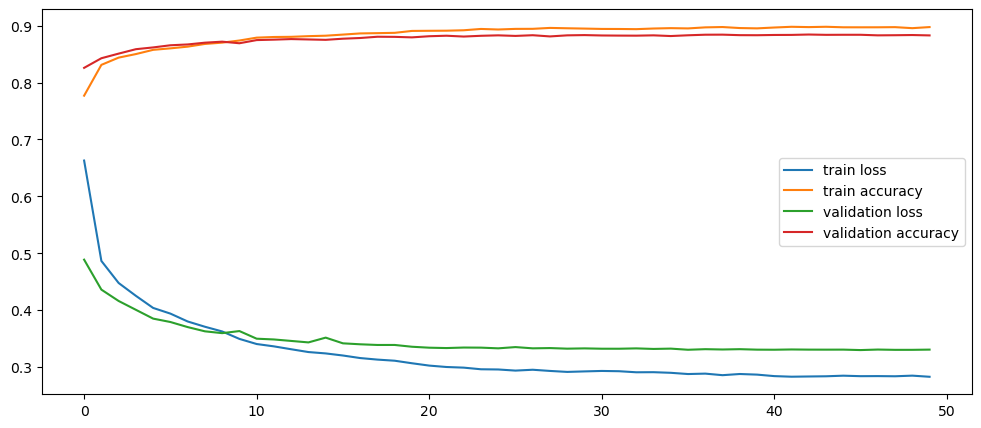

In [44]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_pw.history["loss"], label="train loss")
ax.plot(history_pw.history["accuracy"], label="train accuracy")
ax.plot(history_pw.history["val_loss"], label="validation loss")
ax.plot(history_pw.history["val_accuracy"], label="validation accuracy")
ax.legend()

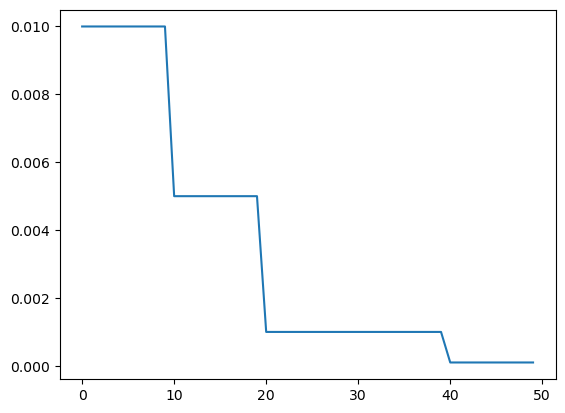

In [45]:
plt.plot(history_pw.epoch, history_pw.history["lr"])

## Performance

In [46]:
per_lr_c = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10)

In [47]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [48]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [49]:
history_per = model.fit(x_train, y_train, epochs=50,
                    validation_split=0.15,
                    callbacks=[per_lr_c])

Epoch 1/50
1594/1594 [==============================] - 6s 3ms/step - loss: 0.6774 - accuracy: 0.7729 - val_loss: 0.4854 - val_accuracy: 0.8292 - lr: 0.0100
Epoch 2/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4911 - accuracy: 0.8294 - val_loss: 0.4316 - val_accuracy: 0.8490 - lr: 0.0100
Epoch 3/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4504 - accuracy: 0.8423 - val_loss: 0.4141 - val_accuracy: 0.8522 - lr: 0.0100
Epoch 4/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4246 - accuracy: 0.8510 - val_loss: 0.3944 - val_accuracy: 0.8608 - lr: 0.0100
Epoch 5/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4069 - accuracy: 0.8553 - val_loss: 0.3859 - val_accuracy: 0.8650 - lr: 0.0100
Epoch 6/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3924 - accuracy: 0.8611 - val_loss: 0.3735 - val_accuracy: 0.8691 - lr: 0.0100
Epoch 7/50
1594/1594 [==============================] - 6s

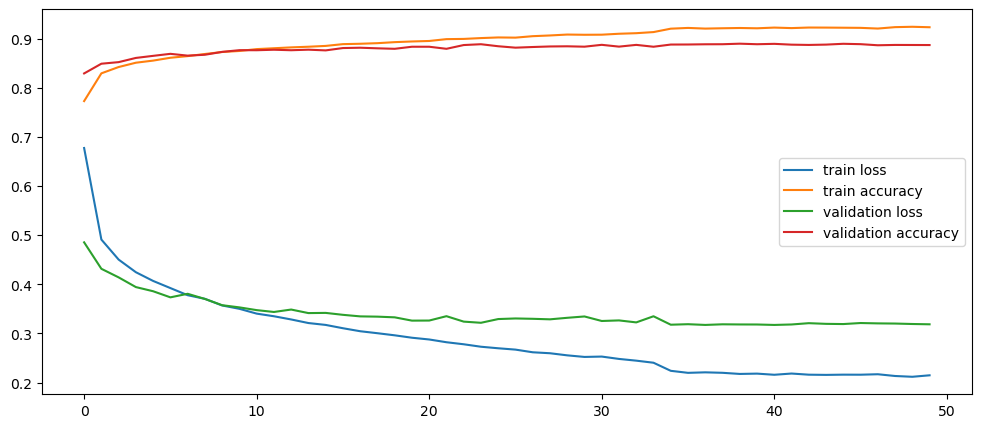

In [50]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_per.history["loss"], label="train loss")
ax.plot(history_per.history["accuracy"], label="train accuracy")
ax.plot(history_per.history["val_loss"], label="validation loss")
ax.plot(history_per.history["val_accuracy"], label="validation accuracy")
ax.legend()

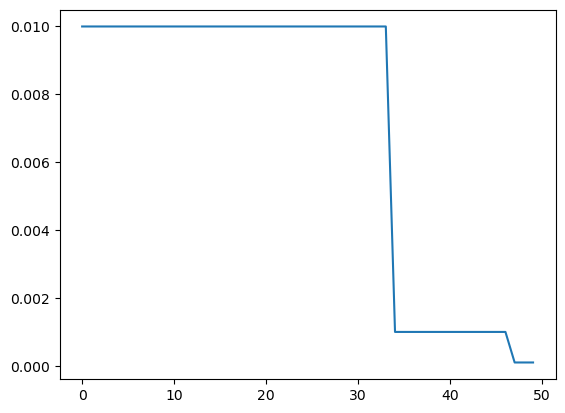

In [51]:
plt.plot(history_per.epoch, history_per.history["lr"])

In [52]:
min(history_per.history["val_loss"])

0.3173445761203766

## 1cycle lr

In [53]:
class Exp_lr(keras.callbacks.Callback):    # the previous code for exponetials were on "epochs" but this one is on "batches".
  def __init__(self, factor):              # this factor will be used to reduce the learning rate after each batch.
    self.factor = factor
    self.lr = []
    self.loss = []
  
  def on_epoch_begin(self, epoch, logs):
    self.previous_loss = 0                                                # at the begining of the epoch, loss is zero.
  
  def on_batch_end(self, batch, logs):                                    # log is a dictionary which includes "loss" and etc
    current_loss = logs["loss"]*(batch+1) - self.previous_loss*batch      # since log['loss'] is accumulative mean of losses.
    self.previous_loss = logs["loss"]
    self.lr.append(keras.backend.get_value(self.model.optimizer.learning_rate))
    self.loss.append(current_loss)
    keras.backend.set_value(self.model.optimizer.learning_rate,              # set the new learning rate
                            self.model.optimizer.learning_rate*self.factor)

In [57]:
def search_lr_loss(model, X, y, epochs=1, batch_size=32,
                   min_lr = 1e-6, max_lr = 10):
  model_weights = model.get_weights()                       # this is the initial weights since later we reset the rates.
  iterations = int(X.shape[0]/batch_size)*epochs
    
  factor = np.exp(np.log(max_lr/min_lr)/iterations)  

  initial_lr = keras.backend.get_value(model.optimizer.learning_rate)
  keras.backend.set_value(model.optimizer.learning_rate, min_lr)       # we start with the minum lr
  epx_lr = Exp_lr(factor)                                            # continue with increasing in lr by multiplying in "factor"
    
    
  history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                      callbacks=[epx_lr])
  keras.backend.set_value(model.optimizer.learning_rate, initial_lr)
    
  model.set_weights(model_weights)     # this part shows loss function with different lrs but before that we reset the weights.
  return epx_lr.lr, epx_lr.loss

In [58]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [59]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [60]:
lr, loss = search_lr_loss(model, x_train, y_train)

1875/1875 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.4818           


(0.0, 5.0)

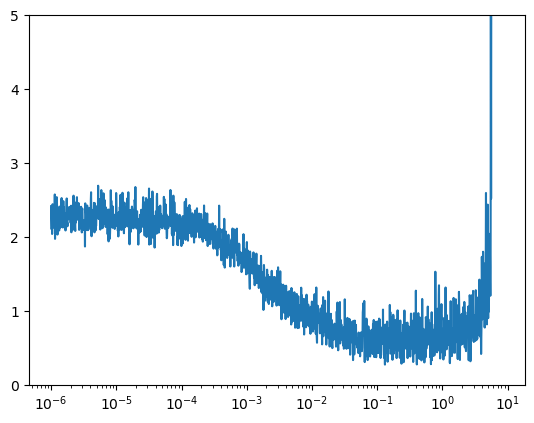

In [61]:
plt.plot(lr, loss)
plt.xscale("log")
plt.ylim(0, 5)

In [20]:
class One_cycle_lr(keras.callbacks.Callback):
  def __init__(self, iterations, max_lr, init_lr=None,
               final_steps=None, final_lr=None):
    self.iterations = iterations
    self.max_lr = max_lr
    self.init_lr = init_lr or max_lr / 10                       # if init_lr not determined its better to be set to 1/10 max_lr.
    self.final_steps = final_steps or int(iterations/10)+1      # the last 1/10th of iterations
    self.half_iterations = int((iterations - self.final_steps)/2)
    self.final_lr = final_lr or self.init_lr/1000                     # init_lr/10000 is suggested for lr in final iteration
    self.iteration = 0
  
  def interpolation(self, y2, y1, x2, x1):
    return (y2 - y1)/(x2 - x1)*(self.iteration - x1) + y1   # x denotes the iteration no and y1 denotes the previous lr.
                                                            # in summary (slope * moving on iteration) + previous lr. 
  
  def on_batch_begin(self, batch, logs):                        # triangle of 1cycle
    if self.iteration < self.half_iterations:
      lr = self.interpolation(self.max_lr, self.init_lr,
                              self.half_iterations, 0)
    elif self.iteration < 2*self.half_iterations:
      lr = self.interpolation(self.init_lr, self.max_lr,
                              2*self.half_iterations, self.half_iterations)
    else:
      lr = self.interpolation(self.final_lr, self.init_lr,
                              self.iterations, 2*self.half_iterations)
    self.iteration += 1
    keras.backend.set_value(self.model.optimizer.learning_rate, lr)

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

C:\Users\AbbasiLio\anaconda3\envs\hossein\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [23]:
epochs = 50
batch_size = 32
iters = int(x_train.shape[0]/batch_size)*epochs
one_cycle_lr = One_cycle_lr(iters, max_lr=0.03)
history_onecycle = model.fit(x_train, y_train,
                             validation_split=0.15,
                             epochs=epochs,
                             callbacks=[one_cycle_lr])

Epoch 1/50
1594/1594 [==============================] - 8s 4ms/step - loss: 0.8813 - accuracy: 0.7170 - val_loss: 0.5951 - val_accuracy: 0.7968
Epoch 2/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.5711 - accuracy: 0.8076 - val_loss: 0.4974 - val_accuracy: 0.8282
Epoch 3/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.5051 - accuracy: 0.8246 - val_loss: 0.4560 - val_accuracy: 0.8389
Epoch 4/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4674 - accuracy: 0.8358 - val_loss: 0.4325 - val_accuracy: 0.8473
Epoch 5/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4416 - accuracy: 0.8446 - val_loss: 0.4148 - val_accuracy: 0.8540
Epoch 6/50
1594/1594 [==============================] - 7s 5ms/step - loss: 0.4236 - accuracy: 0.8508 - val_loss: 0.4000 - val_accuracy: 0.8579
Epoch 7/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4088 - accuracy: 0.8546 - val_loss: 0.3906 - val_accuracy:

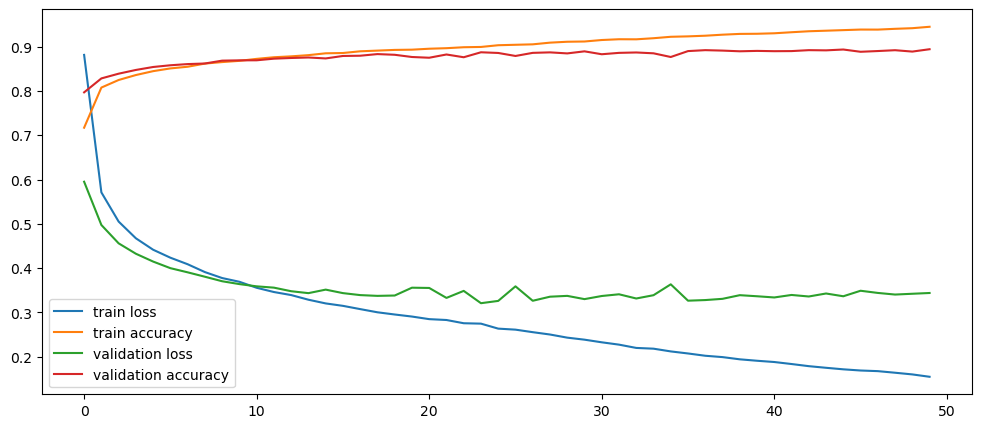

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_onecycle.history["loss"], label="train loss")
ax.plot(history_onecycle.history["accuracy"], label="train accuracy")
ax.plot(history_onecycle.history["val_loss"], label="validation loss")
ax.plot(history_onecycle.history["val_accuracy"], label="validation accuracy")
ax.legend()

# Save

In [ ]:
model.save("model0.h5")

In [ ]:
model0 = keras.models.load_model("model0.h5")

In [ ]:
model0.get_weights()[4]

array([[-0.06704623, -0.11174253, -0.00563421, ..., -0.02029336,
         0.01927974,  0.146645  ],
       [-0.0795177 ,  0.08650598,  0.09299318, ...,  0.03900306,
         0.01614566, -0.09741197],
       [ 0.05308377, -0.00142669,  0.02594119, ...,  0.08916065,
        -0.0596556 , -0.03666259],
       ...,
       [-0.04310189, -0.04397746,  0.12586327, ...,  0.05857656,
         0.15224995,  0.06473288],
       [-0.02583297, -0.05026561,  0.08253539, ...,  0.02924732,
         0.0960122 , -0.10992494],
       [ 0.04974783,  0.0737893 , -0.08731119, ..., -0.12971976,
         0.04082621, -0.13510756]], dtype=float32)

In [ ]:
model1.get_weights()[4]

array([[-0.06704623, -0.11174253, -0.00563421, ..., -0.02029336,
         0.01927974,  0.146645  ],
       [-0.0795177 ,  0.08650598,  0.09299318, ...,  0.03900306,
         0.01614566, -0.09741197],
       [ 0.05308377, -0.00142669,  0.02594119, ...,  0.08916065,
        -0.0596556 , -0.03666259],
       ...,
       [-0.04310189, -0.04397746,  0.12586327, ...,  0.05857656,
         0.15224995,  0.06473288],
       [-0.02583297, -0.05026561,  0.08253539, ...,  0.02924732,
         0.0960122 , -0.10992494],
       [ 0.04974783,  0.0737893 , -0.08731119, ..., -0.12971976,
         0.04082621, -0.13510756]], dtype=float32)

In [ ]:
model0_cloned = keras.models.clone_model(model0)
model0_cloned.set_weights(model0.get_weights())

In [ ]:
model0_cloned.get_weights()[4]

array([[-0.06704623, -0.11174253, -0.00563421, ..., -0.02029336,
         0.01927974,  0.146645  ],
       [-0.07952756,  0.0865082 ,  0.09298178, ...,  0.03900573,
         0.01614139, -0.09744514],
       [ 0.05307489, -0.00144449,  0.02591839, ...,  0.08911391,
        -0.05962572, -0.03665954],
       ...,
       [-0.04281421, -0.04491483,  0.12648545, ...,  0.06454027,
         0.15204246,  0.0652566 ],
       [-0.02540588, -0.05094827,  0.08252302, ...,  0.03255223,
         0.09608161, -0.11013214],
       [ 0.04969933,  0.0737593 , -0.08726431, ..., -0.12961605,
         0.04082294, -0.13520084]], dtype=float32)

In [ ]:
model1 = keras.models.Sequential(model0.layers[:-1])
model1.add(keras.layers.Dense(1, activation="sigmoid"))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 100)               78400     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 75)               

In [ ]:
for layer in model1.layers[:-1]:
  layer.trainable = True
  print(layer.trainable)

True
True
True
True
True
True
True
True


In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 100)               78400     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 75)               

In [ ]:
x_train_new = x_train[:5000, :, :]

In [ ]:
y_train_new = np.where(y_train == 9, 1, 0)[:5000]

In [ ]:
model1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
model1.fit(x_train_new, y_train_new, epochs=15, validation_split=0.15)

Epoch 1/15
133/133 [==============================] - 2s 6ms/step - loss: 0.1294 - accuracy: 0.9605 - val_loss: 0.1399 - val_accuracy: 0.9787
Epoch 2/15
133/133 [==============================] - 1s 4ms/step - loss: 0.0830 - accuracy: 0.9760 - val_loss: 0.0777 - val_accuracy: 0.9827
Epoch 3/15
133/133 [==============================] - 1s 5ms/step - loss: 0.0689 - accuracy: 0.9772 - val_loss: 0.0575 - val_accuracy: 0.9827
Epoch 4/15
133/133 [==============================] - 1s 4ms/step - loss: 0.0583 - accuracy: 0.9826 - val_loss: 0.0507 - val_accuracy: 0.9840
Epoch 5/15
133/133 [==============================] - 1s 4ms/step - loss: 0.0550 - accuracy: 0.9838 - val_loss: 0.0469 - val_accuracy: 0.9840
Epoch 6/15
133/133 [==============================] - 1s 4ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0451 - val_accuracy: 0.9840
Epoch 7/15
133/133 [==============================] - 1s 4ms/step - loss: 0.0473 - accuracy: 0.9842 - val_loss: 0.0427 - val_accuracy: 0.9853
Epoch 

# Optimizers

In [16]:
def func(x):
  return x**2

def func_grad(x):
  return 2*x

In [17]:
def gradient_descent(lr, func_grad):
  x = -10
  x_values = [x]
  for i in range(10):
    x -= lr*func_grad(x)
    x_values.append(x)
  print("iteration 10, x: %s"%x)
  return x_values

In [18]:
def search_path(x_vals, func):
  x_line = np.arange(-15, 15, 0.01)
  plt.plot(x_line, [func(x) for x in x_line])
  plt.plot(x_vals, [func(x) for x in x_vals], "ro-")

iteration 10, x: -0.060466176000000066


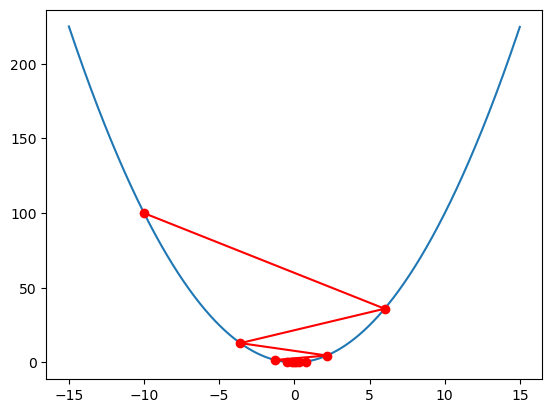

In [19]:
x_values = gradient_descent(0.8, func_grad)
search_path(x_values, func)

In [64]:
def func(x1, x2):
  return x1**2 + 2 * x2**2

def func_grad(x1, x2):
  return (2*x1, 4*x2)

In [226]:
class Optimizers:
  def __init__(self, lr_schedule):
    self.lr_schedule = lr_schedule
  
  def lr(self, rate, t):
    if self.lr_schedule == "constant":
      return self.constant_lr(rate)
    elif self.lr_schedule == "power":
      return self.power_lr(rate, t)
  
  def constant_lr(self, rate):
    return rate
  
  def power_lr(self, rate, t):
    c = 1
    s = 10
#     print(rate/(1 + t/s)**c)
    return rate/(1 + t/s)**c

  def gradient_descent(self, x1, x2, t1, t2, func_grad, rate, t):
    gr_x1, gr_x2 = func_grad(x1, x2)
    return x1 - self.lr(rate, t)*gr_x1, x2 - self.lr(rate ,t)*gr_x2, 0, 0
  
  def stochastic_gradient_descent(self, x1, x2, t1, t2, func_grad, rate, t):
    gr_x1, gr_x2 = func_grad(x1, x2)
    gr_x1 += np.random.normal(0, 1)
    gr_x2 += np.random.normal(0, 1)
    return x1 - self.lr(rate,t)*gr_x1, x2 - self.lr(rate, t)*gr_x2, 0, 0
  
  def gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad, rate, t):
    alpha = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    v1 = alpha*v1 - self.lr(rate, t)*gr_x1
    v2 = alpha*v2 - self.lr(rate,t)*gr_x2
    return x1 + v1, x2 + v2, v1, v2
  
  def nesterov_gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad, rate, t):
    alpha=0.9
    x1 += alpha*v1
    x2 += alpha*v2
    gr_x1, gr_x2 = func_grad(x1, x2)
    v1 = alpha*v1 - self.lr(rate,t)*gr_x1
    v2 = alpha*v2 - self.lr(rate,t)*gr_x2
    return x1 + v1, x2 + v2, v1, v2

  def ada_grad(self, x1, x2, r1, r2, func_grad, rate, t):
    delta = 1e-7
    gr_x1, gr_x2 = func_grad(x1, x2)
    r1 += gr_x1**2
    r2 += gr_x2**2
    x1 -= self.lr(rate,t)/(delta + np.sqrt(r1))*gr_x1
    x2 -= self.lr(rate, t)/(delta + np.sqrt(r2))*gr_x2
    return x1, x2, r1, r2
  
  def rmsprop(self, x1, x2, r1, r2, func_grad, rate , t):
    delta = 1e-7
    rho = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    r1 = r1*rho + (1-rho)*gr_x1**2
    r2 = r2*rho + (1-rho)*gr_x2**2
    x1 -= self.lr(rate,t)/np.sqrt(delta+r1)*gr_x1
    x2 -= self.lr(rate,t)/np.sqrt(delta+r2)*gr_x2
    return x1, x2, r1, r2

  def adam(self, x1, x2, s1, s2, r1, r2, func_grad, rate, t):
    delta, rho1, rho2 = 1e-8, 0.9, 0.999
    gr_x1, gr_x2 = func_grad(x1, x2)

    s1 = rho1*s1 + (1-rho1)*gr_x1
    s2 = rho1*s2 + (1-rho1)*gr_x2

    r1 = rho2*r1 + (1-rho2)*gr_x1**2
    r2 = rho2*r2 + (1-rho2)*gr_x2**2

    shat1 = s1/(1-rho1**(t+1))
    shat2 = s2/(1-rho1**(t+1))

    rhat1 = r1/(1-rho2**(t+1))
    rhat2 = r2/(1-rho2**(t+1))

    x1 -= self.lr(rate,t)*shat1/(np.sqrt(rhat1)+delta)
    x2 -= self.lr(rate,t)*shat2/(np.sqrt(rhat2)+delta)

    return x1, x2, s1, s2, r1, r2

In [219]:
def search(optimizer, func_grad, rate, iteration=20):
  x1, x2, t1, t2 = -5, -2, 0, 0
  x_iterations = [(x1, x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_grad, rate, i+1)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1, x1, x2))
  return x_iterations

In [229]:
def search_adam(optimizer_adam, func_grad, rate, iteration=20):
  x1, x2, s1, s2, r1, r2 = -5, -2, 0, 0, 0, 0
  x_iterations = [(x1, x2)]
  for t in range(iteration):
    x1, x2, s1, s2, r1, r2 = optimizer_adam(x1, x2, s1, s2, r1, r2,func_grad, rate, t+1)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(t+1, x1, x2))
  return x_iterations

In [221]:
def search_path(func, x_iterations):
  plt.plot(*zip(*x_iterations), "-o", color="r")
  x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1, x2, func(x1, x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

epoch 20, x1:-3.3380398587754727, x2:-0.8840048677588156


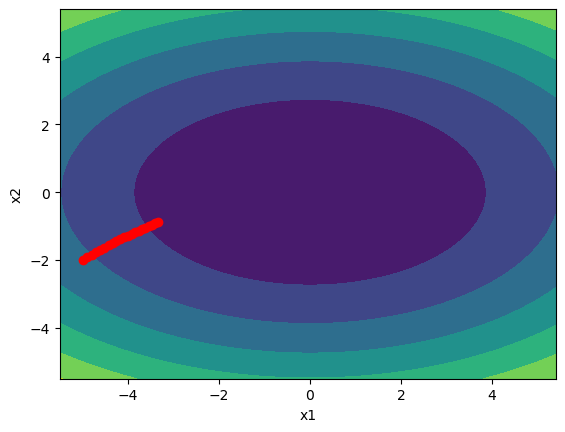

In [222]:
opt = Optimizers("constant")
search_path(func, search(opt.gradient_descent, func_grad,0.01))

epoch 20, x1:-1.6641695802115608e-07, x2:0.0


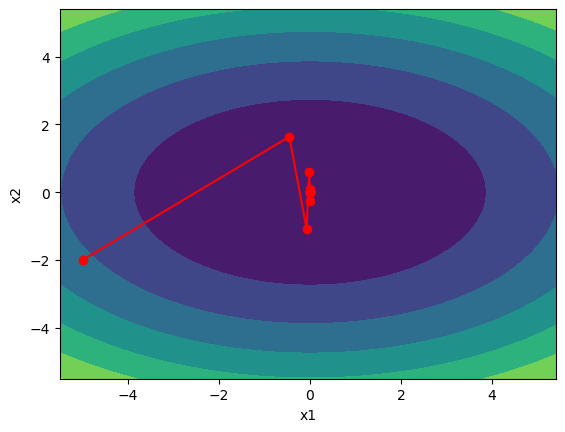

In [196]:
opt = Optimizers("power")
search_path(func, search(opt.gradient_descent, func_grad, 0.5))

epoch 20, x1:-3.3463391253519577, x2:-0.8684120209579042


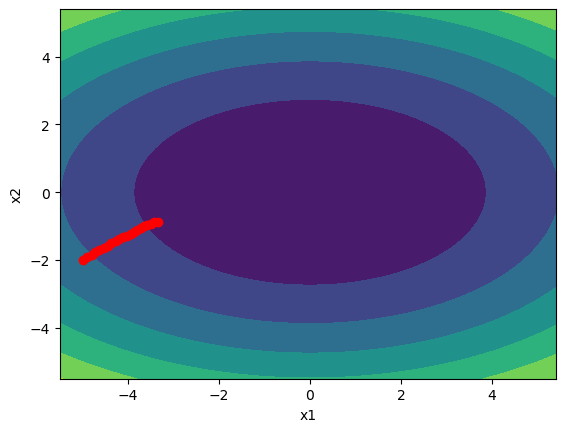

In [197]:
opt = Optimizers("constant")
search_path(func, search(opt.stochastic_gradient_descent, func_grad,0.01))

epoch 20, x1:1.3779266705610334, x2:-0.5800871623873937


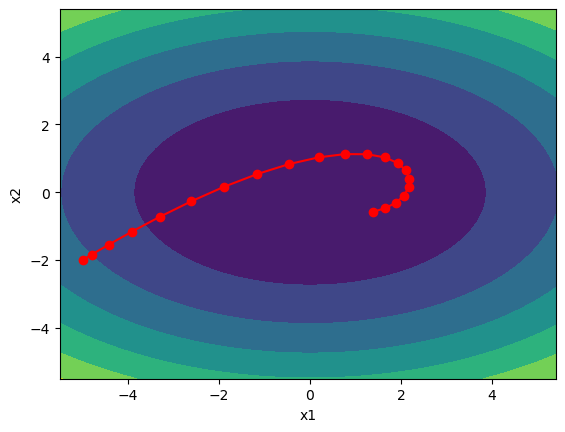

In [198]:
opt = Optimizers("constant")
search_path(func, search(opt.gradient_descent_with_momentum, func_grad, 0.02))

epoch 20, x1:-1.1226000420540831, x2:0.00764917525261577


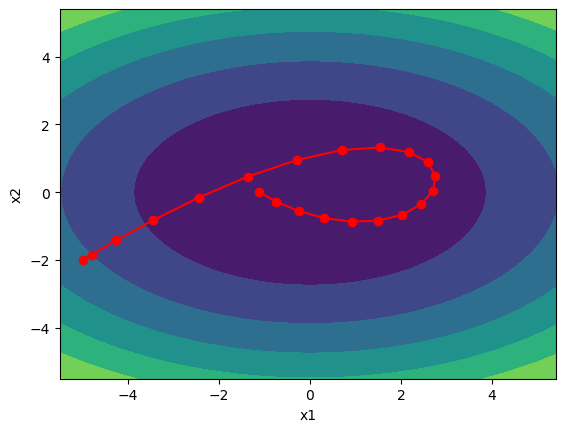

In [199]:
opt = Optimizers("constant")
search_path(func, search(opt.nesterov_gradient_descent_with_momentum, func_grad, 0.02))

epoch 20, x1:-1.8828800844526354, x2:-0.05646173745279083


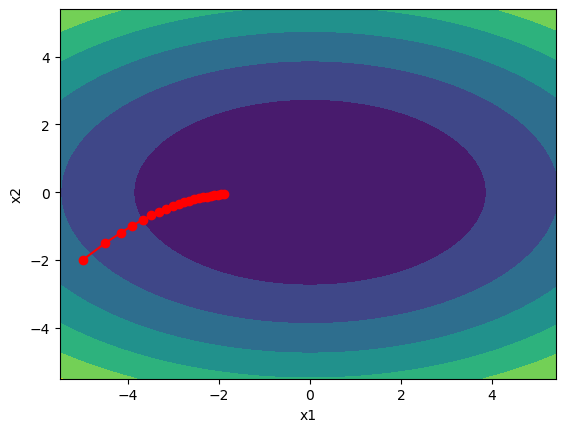

In [200]:
opt = Optimizers("constant")
search_path(func, search(opt.ada_grad, func_grad, 0.5))

epoch 20, x1:-0.000343174646715899, x2:4.843326533006444e-13


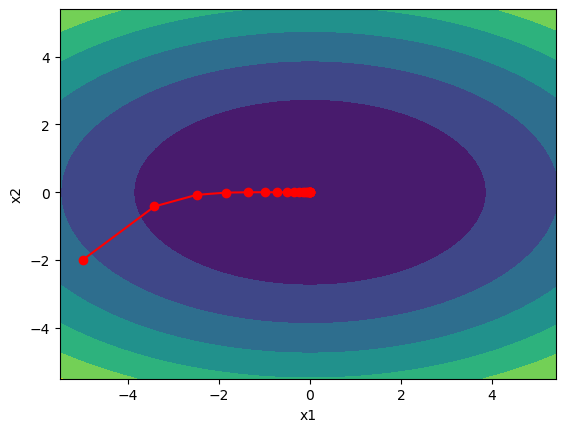

In [201]:
opt = Optimizers("constant")
search_path(func, search(opt.rmsprop, func_grad, 0.5))

epoch 20, x1:-0.017409969654134994, x2:0.3938558052912001


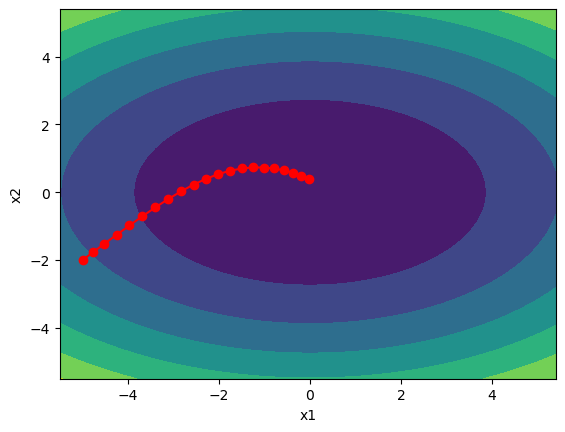

In [230]:
opt = Optimizers("constant")
search_path(func, search_adam(opt.adam, func_grad, 0.3))

# Overfitting

## L1 and L2

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dense(50, activation="elu",
                       kernel_initializer="he_normal"),                       
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Dropout

In [18]:
# note: if you are using "Selu" activation function, you should use "alphadropout". futher information in keras documantation.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),                       
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
history = model.fit(x_train, y_train, 
                    validation_split=0.15,
                    epochs=20)

Epoch 1/20
1594/1594 [==============================] - 7s 4ms/step - loss: 2.3469 - accuracy: 0.6832 - val_loss: 1.6014 - val_accuracy: 0.8037
Epoch 2/20
1594/1594 [==============================] - 6s 4ms/step - loss: 1.4137 - accuracy: 0.7789 - val_loss: 1.0707 - val_accuracy: 0.8212
Epoch 3/20
1594/1594 [==============================] - 6s 4ms/step - loss: 1.0114 - accuracy: 0.7951 - val_loss: 0.8259 - val_accuracy: 0.8227
Epoch 4/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.8042 - accuracy: 0.8040 - val_loss: 0.6773 - val_accuracy: 0.8206
Epoch 5/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.6987 - accuracy: 0.8061 - val_loss: 0.5776 - val_accuracy: 0.8398
Epoch 6/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.6422 - accuracy: 0.8075 - val_loss: 0.5667 - val_accuracy: 0.8247
Epoch 7/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.6100 - accuracy: 0.8108 - val_loss: 0.5307 - val_accuracy:

In [24]:
model_mcd = np.stack([model(x_test, training=True) for _ in range(50)])

In [25]:
# out of shape shows: we have 50 models, in each model we have 10000 samples which classified in 10 classes.
model_mcd.shape

(50, 10000, 10)

In [19]:
# prediction with model including just dropouts.
np.round(model.predict(x_test[:1]), 3)

1/1 [==============================] - 0s 30ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.091, 0.   , 0.355, 0.   ,
        0.554]], dtype=float32)

In [27]:
# in monte-carlo dropout we had 50 models with random dropouts. here all 50 model's prediction showed for the first sample of 
# test set.
np.round(model_mcd[:, :1],3)

array([[[0.   , 0.   , 0.   , 0.   , 0.   , 0.011, 0.   , 0.179, 0.001,
         0.808]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.038, 0.   , 0.322, 0.   ,
         0.64 ]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.06 , 0.   ,
         0.939]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.154, 0.   ,
         0.843]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.055, 0.   , 0.185, 0.   ,
         0.759]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.097, 0.   , 0.211, 0.   ,
         0.691]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.069, 0.   , 0.331, 0.001,
         0.597]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.273, 0.   , 0.037, 0.   ,
         0.69 ]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.227, 0.   , 0.243, 0.   ,
         0.53 ]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.044, 0.   , 0.201, 0.   ,
         0.754]],

       [[0.   , 0.   , 0.   , 0.   , 0.   , 0.007, 0.   , 0.462, 0.   ,
         0.53 ]],


In [21]:
# prediction with the mote-carlo dropout model.
np.round(model_mcd.mean(axis=0)[:1], 3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.142, 0.   , 0.39 , 0.002,
        0.465]], dtype=float32)

In [28]:
class MonteCarloDropout(keras.layers.Dropout):      # we define this kind of MonteCarloDropout when we used batch normalization.
  def call(self, inputs):                           # we make an object from this class,and substitute this with 
    return super().call(inputs, training=True)      # "keras.layers.Dropout" when we define the model. 

## Max-Norm

In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01),
                       kernel_constraint=keras.constraints.max_norm(1.0)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation="elu",
                       kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),                       
    keras.layers.Dense(10, activation="softmax")
])

In [70]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])